
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [444]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [445]:
df = pd.read_csv(r"C:\Users\akimu\OneDrive\Рабочий стол\Mag\churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [447]:
df.describe().round(1) #округляем для удобства чтения

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0,7043.0,7043.0
mean,0.2,32.4,64.8
std,0.4,24.6,30.1
min,0.0,0.0,18.2
25%,0.0,9.0,35.5
50%,0.0,29.0,70.4
75%,0.0,55.0,89.8
max,1.0,72.0,118.8


Вывод 2: 
Небольшая статистика и общая картина клиентской базы
- 57.7% клиентов не имеют партнера
- 70% не являются кормильцами
- большинство (90.3%) имеют телефонную связь
- 57.8% не имеют других тел. линий
- 71.3% не имеют онлайн - безопасность
- 65.5% без онлайн-резервного копирования
- 65.6% не имеют защиту устройства
- 71% без тех. поддержки
- 61.7% не имеют потоковое телевидение и стриминговые сервисы (61.2%)
- 59.2% имеют безналичные счета 
- 48.1% не имеют несколько линей
- ушло 26.5% от общего числа клиентов
- распределение женщин и мужчин практически равномерно

**Вывод:**
Не все данные приведены в числовые значения(TotalCharges). Числовые данные пропусков не имеют, средние значения имеют небольшие отклонения от медиан.
- Колонка "Является ли клиент пожилым гражданином" представлена в виде 1(max) и 0(min), обозначающих "Да" и "Нет" соответсвенно. Среднее количество пожилых людей (= 0.16), что довольно малый процент от общего числа клиентов, медиана = 0. 
- Максимальное количество месяцев, в течение которых клиент оставался в компании 72, min = 0, в среднем 24.6, что чуть ниже медианы = 29.
- Максимальный ежемесячный платеж - 118.8, минимальный - 18.25, ср. знач = 64.8, медиана выше = 70.4.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [448]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [449]:
df= df.replace(['No phone service',"No internet service"], "No") # провели замену 

**Вывод:**
Колонки: OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies - имею по 3 уник знач. среди Yes и NO. Замена произведена выше.

InternetService имеет 3 уник знач(Fiber optic, DSL, No), Contract (Month-to-month, Two year, One year), PaymentMethod 4 способа оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [450]:
df[df.duplicated()]  # дубликатов нет

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [451]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [452]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', nans)#df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [453]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [454]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2503,9067-SQTNS,Male,0,Yes,Yes,44,Yes,No,No,No,No,No,No,No,No,One year,No,Bank transfer (automatic),20.60,926.00,No
4439,9950-MTGYX,Male,0,Yes,Yes,28,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),20.30,487.95,No
3565,4317-VTEOA,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,50.75,50.75,Yes
4068,3423-HHXAO,Female,0,Yes,Yes,14,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.50,272.00,No
108,8597-CWYHH,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,No,Mailed check,94.35,3921.30,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженной на количество времени?

Давайте посмотрим.

In [455]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, поэтому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [456]:
df['TotalCharges'].fillna(0, inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [457]:
t_stat, pvalue = stats.ttest_ind(y_e_s['StreamingMovies'], n_o['StreamingMovies'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:**
Все числовые данные в необходимом виде, замену производить не нужно

# 4. Проверка гипотез

Задание: сравнить две выборки — `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [459]:
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']
churn_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [460]:
churn_yes.InternetService.value_counts()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

In [461]:
churn_yes.Contract.value_counts()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

In [462]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [463]:
churn_yes.PaymentMethod.value_counts()

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

In [464]:
for col in df:
    df[col] = pd.factorize(df[col])[0] # преобразование категориальной переменной в числовую 

In [465]:
t_stat, pvalue = stats.ttest_ind(churn_no['tenure'], churn_yes['tenure'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


In [466]:
churn_yes['tenure'].mean()

17.979133226324237

In [467]:
churn_no['tenure'].mean()

37.56996521066873

**Вывод:**
Подтверждается альтернативная гипотеза - среднее количество месяцев клиентов, кот ушли, отличается (меньше, = 18) от оставшихся (= 37.6). - есть различия между средним значением выборки и `0.5` 

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

Гипотезы:
* H0: выборка имеет распределение по Гауссу.
* H1: выборка не имеет распределения по Гауссу.

Тест Шапиро-Уилка не выполняется, если размер выборки > 5000 и для этого теста p-значение может быть неточным для N > 5000.
Используем К'2-тест Д'Агостино и критерий Андерсона — Дарлинга

In [468]:
df_col = df.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
# К'2-тест Д'Агостино
for col in df_col:
    _, pvalue = stats.normaltest(df[col])

    alpha = 0.05

    if pvalue < alpha:
        print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
    else:
       print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается
P-value:0.00000. Нулевая гипотеза отвергается
P-value:0.00000. Нулевая гипотеза отвергается
P-value:0.00000. Нулевая гипотеза отвергается


In [469]:
# Критерий Андерсона — Дарлинга
for col in df_col:
    result = stats.anderson(df[col])

    print('Statistic: %.3f' % result.statistic)

    p = 0

    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить H0)')
        else:
            print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем H0)')

Statistic: 2035.736
Уровень значимости 15.00 % : критическое значение 0.576, данные не выглядят нормально (отклоняем H0)
Уровень значимости 10.00 % : критическое значение 0.656, данные не выглядят нормально (отклоняем H0)
Уровень значимости 5.00 % : критическое значение 0.787, данные не выглядят нормально (отклоняем H0)
Уровень значимости 2.50 % : критическое значение 0.917, данные не выглядят нормально (отклоняем H0)
Уровень значимости 1.00 % : критическое значение 1.091, данные не выглядят нормально (отклоняем H0)
Statistic: 90.560
Уровень значимости 15.00 % : критическое значение 0.576, данные не выглядят нормально (отклоняем H0)
Уровень значимости 10.00 % : критическое значение 0.656, данные не выглядят нормально (отклоняем H0)
Уровень значимости 5.00 % : критическое значение 0.787, данные не выглядят нормально (отклоняем H0)
Уровень значимости 2.50 % : критическое значение 0.917, данные не выглядят нормально (отклоняем H0)
Уровень значимости 1.00 % : критическое значение 1.091, да

**Вывод:** Данные не следуют нормальному распределению, следовательно, есть выбросы.

## 6. ЗАДАЧИ PRO

In [470]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,0,1,0,1,0,0,0,0,0,0,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,65,1,1,0,1,1,1,1,1,1,1,0,1,295,6526,0
7039,7039,0,0,0,1,21,1,1,1,0,0,1,0,1,1,1,0,3,761,6527,0
7040,7040,0,0,0,1,26,0,0,0,1,1,0,0,0,0,0,0,0,204,6528,0
7041,7041,1,1,0,0,54,1,1,1,0,1,0,0,0,0,0,0,1,113,6529,1


In [471]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.516967,0.299588,30.520659,0.903166,0.421837,0.872923,0.286668,0.655119,0.343888,0.290217,0.384353,0.387903,0.690473,0.407781,1.315633,565.766719,3159.651853,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,21.350145,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,411.690879,1895.182288,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203.500000,1505.500000,0.000000
50%,3521.000000,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,485.000000,3119.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,865.500000,4788.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [472]:
y_e_s = df[df['Churn'] == 1]
y_e_s.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,3555.795078,0.497592,0.254682,0.642055,0.174425,25.393258,0.909042,0.454789,0.814874,0.157838,0.720171,0.291600,0.165864,0.435527,0.437667,0.140182,0.250936,0.813269,580.126806,3072.582665,1.0
std,2037.765072,0.500128,0.435799,0.479524,0.379576,22.407745,0.287626,0.498085,0.521459,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.414714,0.433668,1.083216,405.379299,1899.959145,0.0
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
25%,1790.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.000000,1396.000000,1.0
50%,3580.000000,0.000000,0.000000,1.000000,0.000000,24.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,2975.000000,1.0
75%,5345.000000,1.000000,1.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,866.000000,4705.000000,1.0
max,7041.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1583.000000,6529.000000,1.0


In [473]:
n_o = df[df['Churn'] == 0]
n_o.describe() 
# через describe тоже видно разницу в 5%

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.0
mean,3508.431001,0.507344,0.128721,0.471782,0.344801,32.372826,0.901044,0.409934,0.893893,0.333204,0.631620,0.362775,0.335137,0.365868,0.369927,0.889254,0.464438,1.497101,560.579436,3191.103788,0.0
std,2031.712630,0.499994,0.334923,0.499251,0.475349,20.646443,0.298632,0.491869,0.800728,0.471405,0.482412,0.480847,0.472084,0.481719,0.482831,0.857478,0.498782,1.117620,413.863444,1892.652994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1753.250000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,201.000000,1548.250000,0.0
50%,3501.500000,1.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,477.000000,3168.500000,0.0
75%,5254.750000,1.000000,0.000000,1.000000,1.000000,50.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,865.000000,4817.750000,0.0
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,0.0


**gender**
- H0: Распределение кол мужчин и женщин, отказавшихся от услуг компании = распределению кол-ва оставшихся 
- Н1: Распределение кол мужчин и женщин, отказавшихся от услуг компании, отличается от оставшихся клиентов

In [474]:
y_e_s['gender'].value_counts() # 0 - женщина, 1 - мужчина

gender
0    939
1    930
Name: count, dtype: int64

In [475]:
n_o['gender'].value_counts()

gender
1    2625
0    2549
Name: count, dtype: int64

In [476]:
t_stat, pvalue = stats.ttest_ind(y_e_s['gender'], n_o['gender'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.46990. Подтверждается нулевая гипотеза


**SeniorCitizen**
- H0: Количество пожилых людей и молодых, отказавшихся от услуг компании = кол-ву действующих клиентов
- Н1: Количество пожилых людей и молодых, отказавшихся от услуг компании, отличается от кол-ва  действующих клиентов

In [477]:
y_e_s['SeniorCitizen'].value_counts() # 0 - не пожилой, 1 - пожилой клиент
#в данной выборке пожилых людей больше(25.5%)

SeniorCitizen
0    1393
1     476
Name: count, dtype: int64

In [478]:
n_o['SeniorCitizen'].value_counts() # пожилых людей 12.8%

SeniorCitizen
0    4508
1     666
Name: count, dtype: int64

In [479]:
t_stat, pvalue = stats.ttest_ind(y_e_s['SeniorCitizen'], n_o['SeniorCitizen'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Partner**
- H0: Количество клиентов с партнерами, отказавшихся от услуг компании = кол-ву без партнеров
- Н1: Количество клиентов с партнерами, отказавшихся от услуг компании, отличается от кол-ва клиентов без партнеров

In [480]:
y_e_s['Partner'].value_counts() # 0 - есть партнер, 1 - нет партнера
# у 35.8% есть партнер

Partner
1    1200
0     669
Name: count, dtype: int64

In [481]:
n_o['Partner'].value_counts()
# 52.8% имеют партнера

Partner
0    2733
1    2441
Name: count, dtype: int64

In [482]:
t_stat, pvalue = stats.ttest_ind(y_e_s['Partner'], n_o['Partner'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Dependents**
- H0: Количество клиентов, являющихся/нет кормильцами и отказавшихся от услуг компании = кол-ву оставшихся клиентов
- Н1: Количество клиентов, являющихся/нет кормильцами и отказавшихся от услуг компании, отличается от кол-ва оставшихся клиентов

In [483]:
y_e_s['Dependents'].value_counts() # 0 - не явл. кормильцами, 1 - кормильцы
# 82% не явл кормильцами

Dependents
0    1543
1     326
Name: count, dtype: int64

In [484]:
n_o['Dependents'].value_counts()
# 65% не явл кормильцами

Dependents
0    3390
1    1784
Name: count, dtype: int64

In [485]:
t_stat, pvalue = stats.ttest_ind(y_e_s['Dependents'], n_o['Dependents'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**PhoneService**

In [486]:
y_e_s['PhoneService'].value_counts() # 0 - нет телефонной связи, 1 - есть
# 90.9% имеют телефонную связь

PhoneService
1    1699
0     170
Name: count, dtype: int64

In [487]:
n_o['PhoneService'].value_counts()
# 90.1% имеют телефонную связь

PhoneService
1    4662
0     512
Name: count, dtype: int64

In [488]:
t_stat, pvalue = stats.ttest_ind(y_e_s['PhoneService'], n_o['PhoneService'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.31631. Подтверждается нулевая гипотеза


**MultipleLines**

In [489]:
y_e_s['MultipleLines'].value_counts() # 0 - no, 1 - yes
# у 45.5% есть нескольких линий

MultipleLines
0    1019
1     850
Name: count, dtype: int64

In [490]:
n_o['MultipleLines'].value_counts()
# у 41% есть нескольких линий

MultipleLines
0    3053
1    2121
Name: count, dtype: int64

In [491]:
t_stat, pvalue = stats.ttest_ind(y_e_s['MultipleLines'], n_o['MultipleLines'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00076. Нулевая гипотеза отвергается


**OnlineSecurity**

In [492]:
y_e_s['OnlineSecurity'].value_counts() # 0 - no, 1 - yes
# у 15.8% есть интернет-провайдер

OnlineSecurity
0    1574
1     295
Name: count, dtype: int64

In [493]:
n_o['OnlineSecurity'].value_counts()
# у 33.3% есть интернет-провайдер

OnlineSecurity
0    3450
1    1724
Name: count, dtype: int64

In [494]:
t_stat, pvalue = stats.ttest_ind(y_e_s['OnlineSecurity'], n_o['OnlineSecurity'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**OnlineBackup**

In [495]:
y_e_s['OnlineBackup'].value_counts() # 1 - no, 0 - yes
# у 72% нет онлайн-резервного копирования

OnlineBackup
1    1346
0     523
Name: count, dtype: int64

In [496]:
n_o['OnlineBackup'].value_counts()
# у 63% нет онлайн-резервного копирования

OnlineBackup
1    3268
0    1906
Name: count, dtype: int64

In [497]:
t_stat, pvalue = stats.ttest_ind(y_e_s['OnlineBackup'], n_o['OnlineBackup'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**DeviceProtection**

In [498]:
y_e_s['DeviceProtection'].value_counts() # 0 - no, 1 - yes
# у 70.8% нет защиты устройства

DeviceProtection
0    1324
1     545
Name: count, dtype: int64

In [499]:
n_o['DeviceProtection'].value_counts()
# у 63.7% нет защиты устройства

DeviceProtection
0    3297
1    1877
Name: count, dtype: int64

In [500]:
t_stat, pvalue = stats.ttest_ind(y_e_s['DeviceProtection'], n_o['DeviceProtection'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**TechSupport**

In [501]:
y_e_s['TechSupport'].value_counts() # 0 - no, 1 - yes
# 83.4% без тех. поддержки

TechSupport
0    1559
1     310
Name: count, dtype: int64

In [502]:
n_o['TechSupport'].value_counts()
# 64.5% без тех. поддержки

TechSupport
0    3440
1    1734
Name: count, dtype: int64

In [503]:
t_stat, pvalue = stats.ttest_ind(y_e_s['TechSupport'], n_o['TechSupport'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**StreamingTV**

In [504]:
y_e_s['StreamingTV'].value_counts() # 0 - no, 1 - yes
# 56.4% без потокового телевиденья

StreamingTV
0    1055
1     814
Name: count, dtype: int64

In [505]:
n_o['StreamingTV'].value_counts()
# 63.4% без потокового телевиденья

StreamingTV
0    3281
1    1893
Name: count, dtype: int64

In [506]:
t_stat, pvalue = stats.ttest_ind(y_e_s['StreamingTV'], n_o['StreamingTV'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**StreamingMovies**

In [507]:
y_e_s['StreamingMovies'].value_counts() # 0 - no, 1 - yes
# у 56.2% нет стриминг-сервисов

StreamingMovies
0    1051
1     818
Name: count, dtype: int64

In [508]:
n_o['StreamingMovies'].value_counts()
# у 63% нет стриминг-сервисов

StreamingMovies
0    3260
1    1914
Name: count, dtype: int64

In [509]:
t_stat, pvalue = stats.ttest_ind(y_e_s['StreamingMovies'], n_o['StreamingMovies'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**PaperlessBilling**

In [510]:
y_e_s['PaperlessBilling'].value_counts() # 1 - no, 0 - yes
# 74.9% имеют безналичные счета

PaperlessBilling
0    1400
1     469
Name: count, dtype: int64

In [511]:
n_o['PaperlessBilling'].value_counts()
# 53.6% имеют безналичные счета

PaperlessBilling
0    2771
1    2403
Name: count, dtype: int64

In [512]:
t_stat, pvalue = stats.ttest_ind(y_e_s['PaperlessBilling'], n_o['PaperlessBilling'])
alpha = .05
if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Тепловая карта корреляции Phik**

In [513]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [514]:
!pip install phik -q

"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [515]:
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [516]:
df_phink = df.copy()
df_phink = df_phink.drop(['customerID', 'tenure','InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], axis=1)

interval columns not set, guessing: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


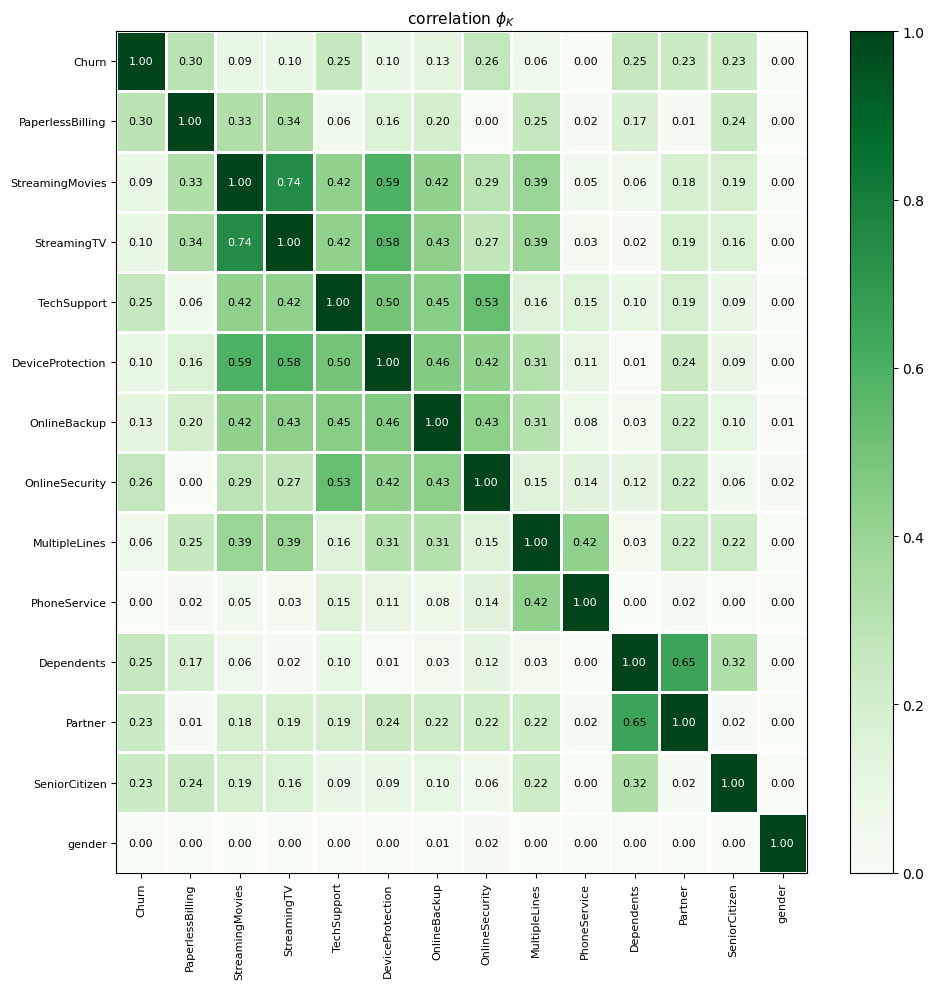

In [517]:
phik_overview = df_phink.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(10, 10))
plt.tight_layout()

Вывод: 

Гендер и наличие телефонной связи не влияют на уход клиентов

Среди клиентов, покинувших компанию, в отличие от оставшихся:
- 25.5, больше пожилых людей (на 12.7%)
- 64.2% не имеют партнера (что на 17% больше, чем у оставшихся)
- 82% не являются кормильцами (на 17% больше)
- у 45.5% есть нескольких линий (на 4.5% больше)
- у 84.2% нет интернет-провайдера (на 17.5% больше)
- у 72% нет онлайн-резервного копирования (на 9% больше)
- у 70.8% нет защиты устройства(на 7% больше, чем у клиентов, которые не ушли)
- 83.4% без тех. поддержки (на 17% больше)
- у 43.6% есть потоковое телевиденье (на 7% больше)
- у 43.8% есть стриминг-сервисы(на 7% больше)
- 74.9% имеют безналичные счета (на 21.3% больше, чем оставшиеся)
- по медиане ежемесячная взимаемая сумма у ушедших клиентов выше на 7% (511 р. против 477 р.)

Исходя из тепловой карты наибольшую взаимосвязь имеют такие парамтры, как:
- StreamingMovies и StreamingTV = 0.74
- StreamingMovies, StreamingTV и DeviceProtection = 0.59, 0.58
- TechSupport и OnlineSecurity = 0.53
- Dependents и Partner = 0.65
